Edit this file and write your solutions to the problems in sections specified with `# Your solution goes here`.

# Analyzing Chicken and Eggs
The goal of this assignment is to recreate the analysis of the chicken and eggs data set presented in this video:  
https://www.youtube.com/watch?v=j6ClFJhnG18

Watch the video. The first half is about visualization in general, the chicken and egg analysis starts at about 9:50. Note that the author uses R rather than Python.

The data set is unfortunately not available, so a dataset has been created, saved as `chicken.csv`. There are differences in the numbers, but the character should be the same.

In A. Analysis below, the different analysis steps are prepared for you. For all plots, you are asked to produce the plot first with Pandas.plot() and then with Seaborn. Section B. Reflection asks you to think about both of these ways of plotting, which you prefer and for what cases. 

In [4]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## A. Analyzing the data

### 0. Read in the data 

In [5]:
# Your solution goes here
chicken_df = pd.read_csv("chicken.csv")
chicken_df

,week,age,diet,weight,eggs
0,0,147,A,3106.2,4
1,0,157,A,2891.7,5
2,0,163,A,2958.3,4
3,0,145,A,3188.7,5
4,0,162,A,3491.7,5
...,...,...,...,...,...
355,22,212,C,2966.5,4
356,22,176,C,3927.9,4
357,22,180,C,3361.6,5
358,22,193,C,3804.4,5


### 1. Weight by diet summary stats (Pandas groupby and describe)

In [6]:
# Your solution goes here
chicken_df.groupby(['diet'])['weight'].describe()

,count,mean,std,min,25%,50%,75%,max
diet,,,,,,,,
A,120.0,3634.852500,447.654043,2683.9,3284.250,3601.10,3952.375,4845.0
B,120.0,3351.299167,316.871704,2690.3,3122.175,3333.55,3590.400,4057.6
C,120.0,3415.831667,449.476292,2383.3,3114.500,3417.85,3731.375,4508.7


### 2. Eggs by diet summary stats (Pandas groupby and describe)

In [7]:
# Your solution goes here
chicken_df.groupby(['diet'])['eggs'].describe()

,count,mean,std,min,25%,50%,75%,max
diet,,,,,,,,
A,120.0,4.483333,0.501817,4.0,4.0,4.0,5.0,5.0
B,120.0,4.033333,0.709282,3.0,4.0,4.0,5.0,5.0
C,120.0,4.175000,0.706066,3.0,4.0,4.0,5.0,5.0


### 3.1 Histogram of age of chickens (Pandas hist())

Text(0, 0.5, 'frequency')

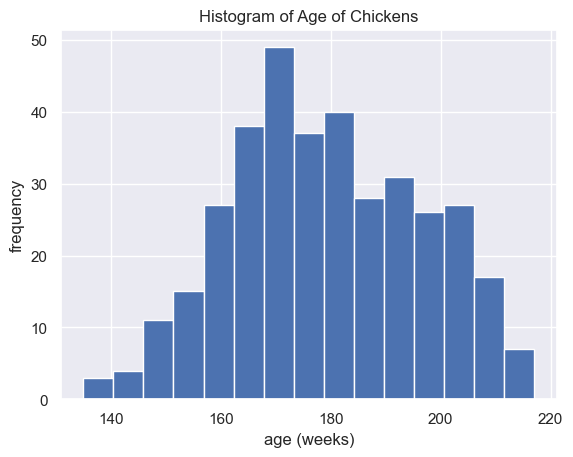

In [12]:
# Your solution goes here
sns.set()
age_histo = chicken_df['age'].hist(bins = 15)

age_histo.set_title("Histogram of Age of Chickens")
age_histo.set_xlabel("age (weeks)")
age_histo.set_ylabel("frequency")

### 3.2 Histogram of age of chickens (Seaborn distplot())

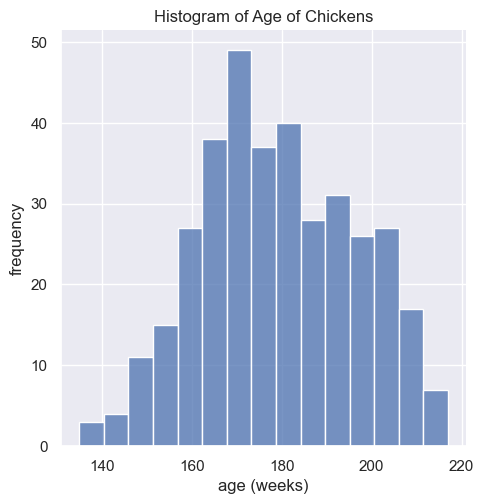

In [13]:
# Your solution goes here
sns.set()
age_histo_sns = chicken_df['age']
sns.displot(age_histo_sns, bins = 15).set(title = "Histogram of Age of Chickens", xlabel = "age (weeks)", ylabel = "frequency")

### 4.1 Boxplot age (Pandas boxplot())

Text(0, 0.5, 'age (weeks)')

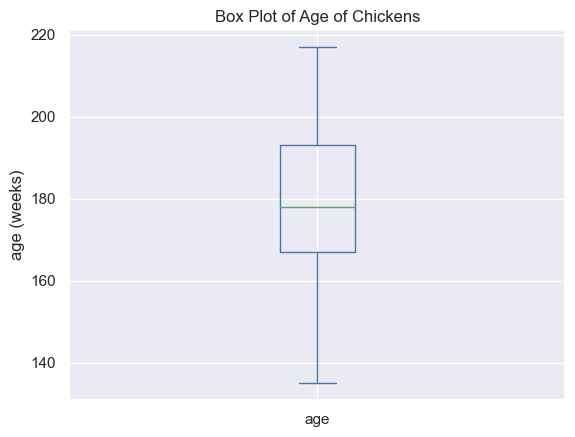

In [14]:
# Your solution goes here
age_boxplot =chicken_df['age'].plot.box()

age_boxplot.set_title("Box Plot of Age of Chickens")
age_boxplot.set_ylabel("age (weeks)")

### 4.2 Boxplot age (Seaborn boxplot())

[Text(0.5, 1.0, 'Box Plot of Age of Chickens'), Text(0, 0.5, 'age (weeks)')]

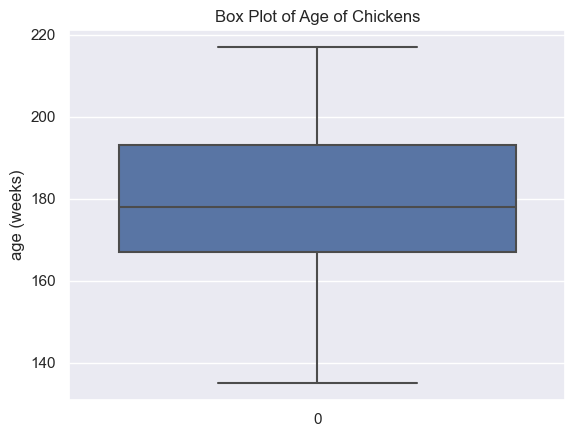

In [15]:
# Your solution goes here
age_boxplot_sns = chicken_df['age']
sns.boxplot(age_boxplot_sns).set(title = "Box Plot of Age of Chickens", ylabel = "age (weeks)")

### 5.1 Plot average weight vs weeks by diet (Pandas plot() on groupby()) 
Hint: groupby week and diet, calculate mean, get the weight colum, unstack and plot  
see here for more details:  
https://scentellegher.github.io/programming/2017/07/15/pandas-groupby-multiple-columns-plot.html

<AxesSubplot: title={'center': 'Average weight vs weeks by Diet'}, xlabel='week', ylabel='weight'>

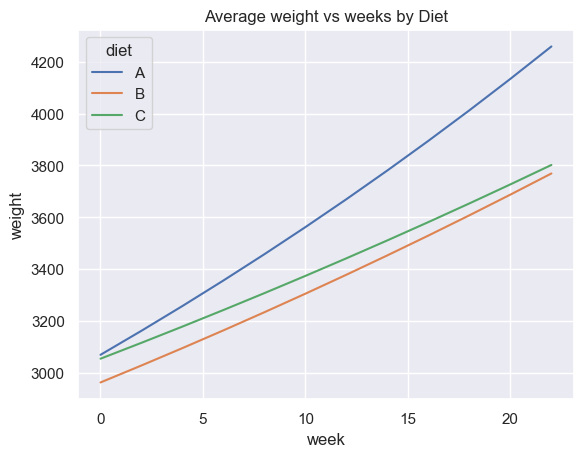

In [16]:
# Your solution goes here
avg_w_d = chicken_df.groupby(['week','diet']).mean()['weight'].unstack().plot(title = "Average weight vs weeks by Diet", ylabel = "weight")
avg_w_d

### 5.2 Plot average weight vs weeks by diet (Seaborn pointplot()) 
Hint: set `ci=None` to not get error bars

<AxesSubplot: title={'center': 'Average weight vs weeks by Diet'}, xlabel='week', ylabel='weight'>

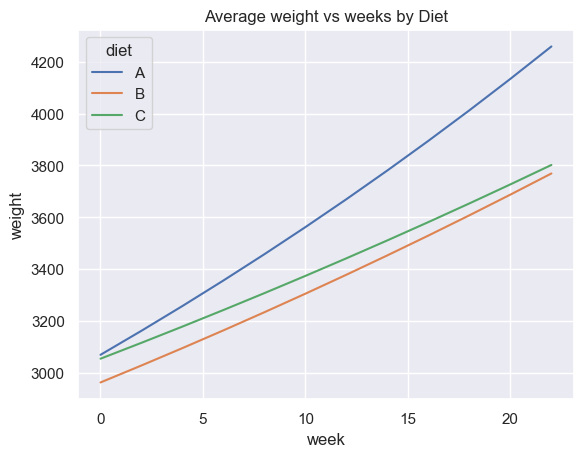

In [17]:
# Your solution goes here
avg_w_d = chicken_df.groupby(['week','diet']).mean()['weight'].unstack().plot(title = "Average weight vs weeks by Diet", ylabel = "weight")
avg_w_d

### 6.1 Plot average eggs vs weeks by diet (Pandas plot() on groupby()) 
Hint: It might be good to start y axis at 0

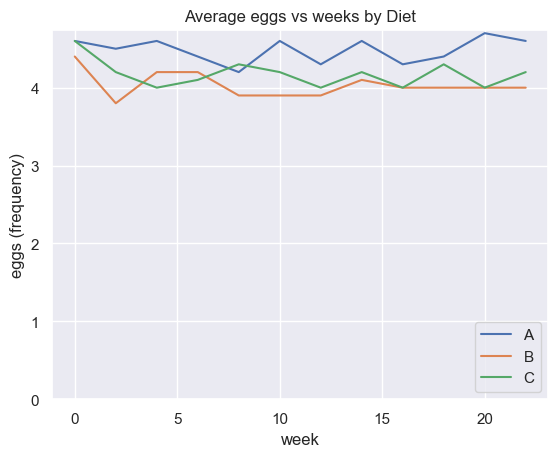

In [18]:
# Your solution goes here
avg_e_d = chicken_df.groupby(['week','diet']).mean()['eggs'].unstack().plot(title = "Average eggs vs weeks by Diet", ylabel = "eggs (frequency)")
avg_e_d.set_ylim(ymin=0)
avg_e_d.legend(loc = 'lower right')

### 6.2 Plot average eggs vs weeks by diet (Seaborn pointplot()) 
Hint: It might be good to start y axis at 0

[(0.0, 5.0)]

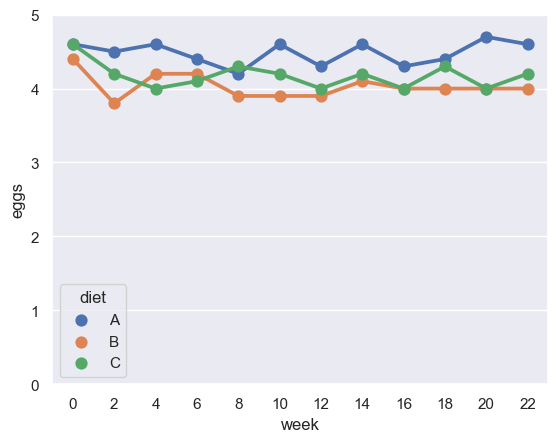

In [19]:
# Your solution goes here
seaplot_eggs_weeks = pd.concat([chicken_df['week'],chicken_df['eggs'],chicken_df['diet']],axis = 1)
snsPointPlot = sns.pointplot(data = seaplot_eggs_weeks, x = 'week', y = 'eggs', hue = 'diet', errorbar=None)
snsPointPlot.set(ylim = (0,5))

### 7. Average age by diet stats (Pandas groupby())

In [20]:
# Your solution goes here
chicken_df.groupby(['diet'])['age'].mean()

diet
A    166.5
B    187.9
C    183.4
Name: age, dtype: float64

### 8.1 Scatter plot eggs vs age by diet (Pandas plot.scatter())
Hint: You need to loop over the diet 'A', 'B', 'C' and plot each seperatly in the same axes. Use `ax=plt.gca()` to get repeated plots to appear in the same axes. For more info, have a look at the following thread:  
https://stackoverflow.com/questions/26139423/plot-different-color-for-different-categorical-levels-using-matplotlib


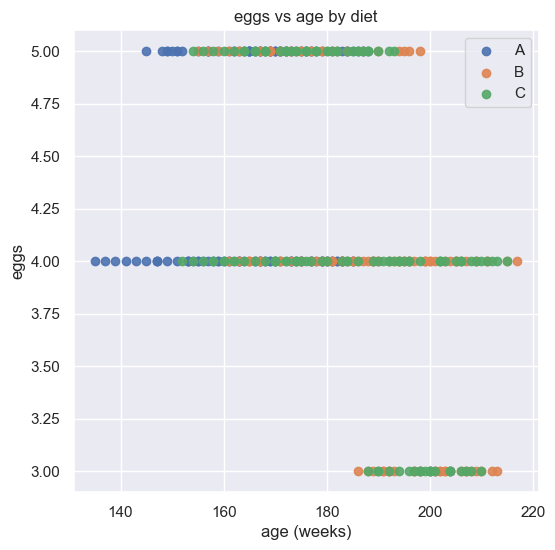

In [21]:
# Your solution goes here
egg_weeks = pd.concat([chicken_df['eggs'],chicken_df['age'],chicken_df['diet']],axis = 1)
egglist = (egg_weeks[egg_weeks['diet'] == 'A'], egg_weeks[egg_weeks['diet'] == 'B'], egg_weeks[egg_weeks['diet'] == 'C'])

egglist[0]

labels = ['A', 'B', 'C']

fig, ax = plt.subplots(figsize=(6, 6))

for i in range(3):
    index = egglist[i]['age']
    values = egglist[i]['eggs']
    plt.scatter(index,values, label = labels[i], alpha= 0.9)

ax.set_xlabel("age (weeks)")
ax.set_ylabel("eggs")
ax.set_title("eggs vs age by diet")
ax.legend()

### 8.2 Scatter plot eggs vs age by diet (Seaborn scatterplot()) 


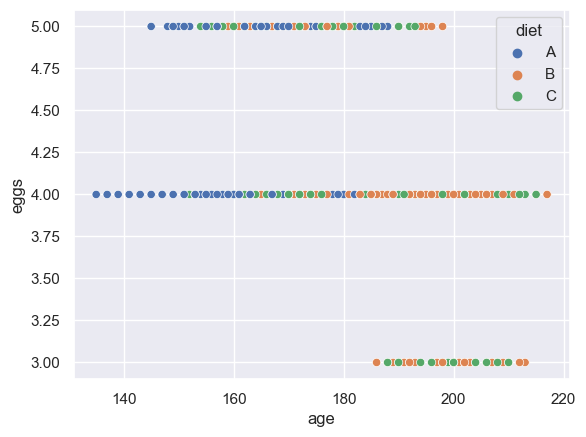

In [22]:
# Your solution goes here
seaplot_eggs_weeks = pd.concat([chicken_df['eggs'],chicken_df['age'],chicken_df['diet']],axis = 1)
snsPointPlot = sns.scatterplot(data = seaplot_eggs_weeks, x = 'age', y = 'eggs', hue = 'diet')

### 9.1 Boxplot age by diet (Pandas boxplot())

Text(0.5, 0.98, '')

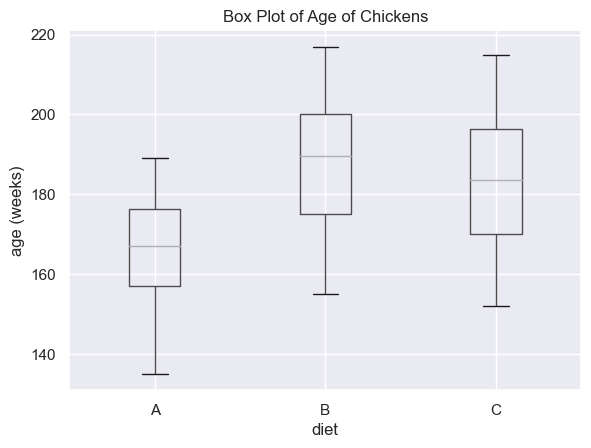

In [23]:
# Your solution goes here
boxplot_age = pd.concat([chicken_df['diet'],chicken_df['age']],axis = 1)
boxplotgraph = boxplot_age.boxplot(by='diet',column='age')
boxplotgraph.set_title("Box Plot of Age of Chickens")
boxplotgraph.set_ylabel("age (weeks)")
plt.suptitle("")

### 9.2 Boxplot age by diet (Seaborn boxplot())

[Text(0.5, 1.0, 'Box Plot of Age of Chickens'), Text(0, 0.5, 'age (weeks)')]

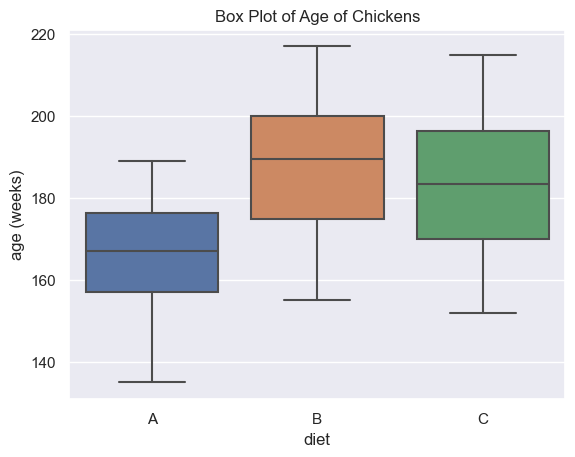

In [24]:
# Your solution goes here
boxplot_age = pd.concat([chicken_df['diet'],chicken_df['age']],axis = 1)
age_boxplot_sns = boxplot_age
sns.boxplot(age_boxplot_sns,  x = 'diet', y= 'age').set(title = "Box Plot of Age of Chickens", ylabel = "age (weeks)")

## B. Reflection
After plotting with Pandas and Seaborn, in your opinion:
1. What are the strengths/weaknesses of Pandas?
2. What are the strengths/weaknesses of Seaborn?
3. When would you use Pandas and when would you use Seaborn?

**Your answers can go here:**

1.
Pandas Strengths
The strengths of panadas is that it is really easy to use and it's been in use for far longer so there are many more examples/error threads/existing code to pull from.  The documentation is quite extensive and has been developed quite thoroughly.  It was also easier to figure out how to use the panads plots for simply plots compared to seaborn.

Panadas Weaknesses
The weaknesses is that they look alot worse and are more difficult to read.  I even ended up using the seaborn "template" just to make all the plots look nicer.  Another pointer is that there are likely many features in seaborn that are not in panadas and vice versa.

2.
Seaborn Strengths
The strengths for seaborn is that it is fair more code dense.  Even for these simple plots the seaborn code is obviously more concise and easier to read.  This makes it faster to produce figures assuming you are well versed in seaborn.  The seaborn styles also look much nicer and makes for an easier read.

Seaborn Weaknesses
I found seaborn less intuitive to learn in comparision to the Panadas libary.  The Seaborn website/documentation is also a little more difficult to read (although this may not be the case for a regular user).  There is also far fewer example online that I could use for reference (in comparision to pandas you can confidenently assume the graph or error you are dealing with have already been accomplished by other's online).  Seaborn also seems to work nicely with panadas dataframes whereas for the matplotlib I had to iterate through the different diets just to get different scatter plot data (section 8.1 specifically).

3.
If I end up doing a report with many figures I would use Seaborn and especially so if the figures needed to be presented professionally.  I would also use Seaborn if I'm using Panadas dataframes alot because it seems to work well (no for loops).  In short I would likely used Seaborn for major projects/code.

If I don't need many figures or I am only looking for a quick and simple figure that I will end up deleting later then I would use the matplotlib/panadas module.  Examples would include small homework assignments, analyzing data quickly, small personal projects.

I also do not have a concrete idea of which module is a faster between the two.  If I had a major project I would need to either do testing or read up on which module is faster because for large sets of data the graph creation time could be significantly different.  I should note that although I did not spend an extensive time searching I could not find a explicit answer to this question online.



